# Problem Set 3 Shubham Chawla 200493036

## Question 1 Occupations

### Step 1. Import the necessary libraries

In [59]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this address
### Step 3. Assign it to a variable called users

In [11]:
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep = '|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4. Mean Age of the Occupation

In [41]:
users.groupby('occupation').mean(['age'])

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [34]:
#pivot table showing count of occupations by gender and replacing NaNs with 0
mRatio = pd.pivot_table(data = users, index = 'occupation', columns = 'gender', values = 'age', aggfunc = 'count', fill_value = 0)

#finding total count M+F
total = mRatio[['M','F']].sum(axis = 1)

#finding male ratio 
mRatio['mRatio'] = (mRatio['M'] / total)

#sorting from most to the least
mRatio.sort_values(by = ['mRatio'], ascending = False)

gender,F,M,mRatio
occupation,,,
doctor,0,7,1.000000
engineer,2,65,0.970149
technician,1,26,0.962963
retired,1,13,0.928571
programmer,6,60,0.909091
executive,3,29,0.906250
scientist,3,28,0.903226
entertainment,2,16,0.888889
lawyer,2,10,0.833333


### Step 6. For each occupation, calculate the minimum and maximum ages

In [42]:
age = pd.pivot_table(data = users, index = 'occupation', values = 'age', aggfunc = ['min','max'], fill_value = 0)
age

,min,max
,age,age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62


### Step 7. For each combination of occupation and sex, calculate the mean age

In [43]:
meanAge = pd.pivot_table(data = users, index = ['occupation','gender'], values = 'age', aggfunc = ['mean'], fill_value = 0)
meanAge 

mean
                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

### Step 8. For each occupation present the percentage of women and men

In [57]:
percentGender = pd.pivot_table(data = users, index = 'occupation', columns = 'gender', values = 'age', aggfunc = 'count', fill_value = 0)
percentGender

#finding total count M+F
tot = percentGender[['M','F']].sum(axis = 1)

#finding percentage of women and men
percentGender['Female %age'] = ((percentGender['F'] / tot)*100)
percentGender['Male %age'] = ((percentGender['M'] / tot)*100)
percentGender.round(decimals = 3)


gender,F,M,Female %age,Male %age
occupation,,,,
administrator,36,43,45.570,54.430
artist,13,15,46.429,53.571
doctor,0,7,0.000,100.000
educator,26,69,27.368,72.632
engineer,2,65,2.985,97.015
entertainment,2,16,11.111,88.889
executive,3,29,9.375,90.625
healthcare,11,5,68.750,31.250
homemaker,6,1,85.714,14.286


## Question 2 Euro Teams

### Step 1. Import the necessary libraries

In [96]:
import pandas as pd

### Step 2 Import the dataset from this address
### Step 3. Assign it to a variable called euro12

In [97]:
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep = ',')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4. Select only the Goal column

In [98]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many teams participated in the Euro2012?

In [99]:
print("Number of participating teams are:",euro12['Team'].count())

Number of participating teams are: 16


### Step 6. What is the number of columns in the dataset?

In [100]:
print("Number of columns is:",euro12.shape[1])

Number of columns is: 35


### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [101]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [102]:
discipline.sort_values(['Yellow Cards','Red Cards'], ascending = [True, True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
11,Republic of Ireland,6,1
1,Czech Republic,7,0
14,Sweden,7,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [288]:
print("Mean of ",euro12.groupby('Team').agg({'Yellow Cards' : 'mean'}).mean())

Mean of  Yellow Cards    7.4375
dtype: float64


### Step 10. Filter teams that scored more than 6 goals

In [104]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [105]:
euro12[euro12.Team.str[0]=='G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [106]:
euro12.iloc[0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 13. Select all columns except the last 3

In [107]:
euro12.iloc[:,0:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [108]:
sAccuracy = euro12.loc[euro12.Team.str.contains('England|Italy|Russia')]
sAccuracy[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3 Housing

### Step 1. Import the necessary libraries

In [109]:
import pandas as pd
import numpy as np

### Step 2. Create 3 differents Series, each of length 100, as follows:
#### • The first a random number from 1 to 4
#### • The second a random number from 1 to 3
#### • The third a random number from 10,000 to 30,000

In [112]:
s1 = pd.Series(np.random.randint(1,5,100))
s1

0     1
1     2
2     2
3     4
4     3
     ..
95    3
96    3
97    2
98    2
99    3
Length: 100, dtype: int32

In [115]:
s2 = pd.Series(np.random.randint(1,4,100))
s2

0     3
1     1
2     1
3     2
4     1
     ..
95    3
96    2
97    3
98    2
99    2
Length: 100, dtype: int32

In [116]:
s3 = pd.Series(np.random.randint(10000,30001,100))
s3

0     23859
1     11544
2     29864
3     28331
4     14188
      ...  
95    26926
96    21382
97    10399
98    27986
99    19528
Length: 100, dtype: int32

### Step 3. Create a DataFrame by joining the Series by column

In [117]:
dfHousing = pd.DataFrame({'s1': s1,'s2': s2,'s3': s3,})
dfHousing

,s1,s2,s3
0,1,3,23859
1,2,1,11544
2,2,1,29864
3,4,2,28331
4,3,1,14188
...,...,...,...
95,3,3,26926
96,3,2,21382
97,2,3,10399
98,2,2,27986


### Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [119]:
dfHousing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
dfHousing

,bedrs,bathrs,price_sqr_meter
0,1,3,23859
1,2,1,11544
2,2,1,29864
3,4,2,28331
4,3,1,14188
...,...,...,...
95,3,3,26926
96,3,2,21382
97,2,3,10399
98,2,2,27986


### Step 5. Create one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [120]:
bigcolumn = pd.concat([s1,s2,s3])
bigcolumn

0         1
1         2
2         2
3         4
4         3
      ...  
95    26926
96    21382
97    10399
98    27986
99    19528
Length: 300, dtype: int32

### Step 6. Ops it seems it is going only until index 99. Is it true?

In [125]:
# Series Concatenation doesnt reset the index
#This is the reason as opposed to showing a list of 299, it's showing us index until 99.
# We can check using the following commands
print("Length of bigcolumn:",len(bigcolumn))
print("The index is:",max(bigcolumn.index))

Length of bigcolumn: 300
The index is: 99


### Step 7. Reindex the DataFrame so it goes from 0 to 299

In [127]:
bigcolumn.reset_index()

,index,0
0,0,1
1,1,2
2,2,2
3,3,4
4,4,3
...,...,...
295,95,26926
296,96,21382
297,97,10399
298,98,27986


## Question 4 Wind Statistics

### Step 1. Import the necessary libraries

In [248]:
import pandas as pd
import numpy as np
import datetime

### Step 2. Import the dataset from the attached file wind.txt
### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [249]:
data = pd.read_csv('wind.txt', sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [250]:
#converting  Yr, Mo and Dy to string
data['Yr'] = data['Yr'].astype(str)
data['Mo'] = data['Mo'].astype(str)
data['Dy'] = data['Dy'].astype(str)

# concatenating first 3 columns
data['Date'] = '20'+ data['Yr'] + '-' + data['Mo'] + '-' + data['Dy']

# converting Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop(columns = ['Yr','Mo','Dy'])

#moving Date to first column
first = data.pop('Date')
data.insert(0, 'Date', first)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,2078-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,2078-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,2078-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,2078-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it

In [251]:
def fixDate(dt_col):
    if dt_col.year > 2000:
        year = dt_col.year - 100
    else:
        year = dt_col.year
    return datetime.date(year,dt_col.month, dt_col.day)

data['Date'] = data['Date'].apply(fixDate)
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

In [252]:
dataNew = data.set_index('Date')
dataNew.index.astype('datetime64[ns]')

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

### Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [253]:
dataNew.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [254]:
nonMissing = dataNew.apply(lambda x: x.count(), axis=0)
print("Total non-missing values are",nonMissing.sum())

Total non-missing values are 78857


### Step 8 Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
### A single number for the entire dataset.

In [255]:
#ignoring all the null values although it is not required in this case
dataNew.mean(skipna=True).mean()

10.227982360836938

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [256]:
loc_stats = pd.DataFrame()
loc_stats['min'] = dataNew.min()
loc_stats['max'] = dataNew.max()
loc_stats['mean'] = dataNew.mean()
loc_stats['standard dev'] = dataNew.std()
loc_stats

,min,max,mean,standard dev
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [257]:
day_stats = pd.DataFrame()
day_stats['min'] = dataNew.min(axis=1)
day_stats['max'] = dataNew.max(axis=1)
day_stats['mean'] = dataNew.mean(axis=1)
day_stats['standard dev'] = dataNew.std(axis=1)
day_stats

,min,max,mean,standard dev
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


### Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January

In [281]:
dataNew.index = pd.to_datetime(dataNew.index)
dataNew.loc[dataNew.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### Step 12. Downsample the record to a yearly frequency for each location.

In [283]:
yearlyDS = dataNew.resample('Y').mean()
yearlyDS.index = yearlyDS.index.to_period('Y')
yearlyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


### Step 13. Downsample the record to a monthly frequency for each location

In [284]:
monthlyDS = dataNew.resample('M').mean()
monthlyDS.index = monthlyDS.index.to_period('M')
monthlyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


### Step 14. Downsample the record to a weekly frequency for each location.

In [285]:
weeklyDS = dataNew.resample('W').mean()
weeklyDS.index = weeklyDS.index.to_period('W')
weeklyDS

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [296]:
data1961 = dataNew[(dataNew.index < pd.to_datetime('1962-01-01')) & (dataNew.index > pd.to_datetime('1961-01-01'))]
weeklydata = data1961.resample('W').agg(['min','max','mean','std'])
weeklydata

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

## Question 5

### Step 1. Import the necessary libraries
### Step 2. Import the dataset from this address.
### Step 3. Assign it to a variable called chipo.

In [362]:
import pandas as pd

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')

### Step 4. See the first 10 entries

In [349]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [350]:
print("Number of observations in the dataset are:",chipo.shape[0])

Number of observations in the dataset are: 4622


### Step 6. What is the number of columns in the dataset?

In [351]:
print("Number of columns in the dataset are:",chipo.shape[1])

Number of columns in the dataset are: 5


### Step 7. Print the name of all the columns.

In [352]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [353]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item?

### Step 10. For the most-ordered item, how many items were ordered?

In [354]:
pd.pivot_table(data = chipo, index = 'item_name', values = 'quantity', aggfunc = 'sum', fill_value = 0).sort_values(by=['quantity'],ascending = False).head(1)

,quantity
item_name,
Chicken Bowl,761


### Step 11. What was the most ordered item in the choice_description column?

In [355]:
pd.pivot_table(data = chipo, index = 'choice_description', values = 'quantity', aggfunc = 'sum', fill_value = 0).sort_values(by=['quantity'],ascending = False).head(1)

,quantity
choice_description,
[Diet Coke],159


### Step 12. How many items were orderd in total?

In [356]:
print("Total items ordered were:",chipo.quantity.sum())

Total items ordered were: 4972


### Step 13.
#### • Turn the item price into a float
#### • Check the item price type
#### • Create a lambda function and change the type of item price
#### • Check the item price type


In [363]:
# check item_price type
chipo.item_price.dtype

dtype('O')

In [364]:
# replacing $ in item_price
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$', ''))

# lambda function for changing type to float
func = lambda x: float(x)
chipo.item_price = chipo.item_price.apply(func)

In [365]:
#checking item_price type
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [372]:
rev =  chipo['quantity']*chipo['item_price']
print("Total revenue for the period in the dataset was",rev.sum())

Total revenue for the period in the dataset was 39237.02


### Step 15. How many orders were made in the period?

In [382]:
print(chipo['order_id'].value_counts().count(),"orders were made in the period.")

1834 orders were made in the period.


### Step 16. What is the average revenue amount per order?

In [383]:
pd.pivot_table(data = chipo, index = 'order_id', values = 'item_price', aggfunc = 'mean', fill_value = 0)

,item_price
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000
1832,6.600000


### Step 17. How many different items are sold?

In [386]:
print(chipo['item_name'].value_counts().count(),"different items were sold in the period.")

50 different items were sold in the period.


## Question 6

### Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [594]:
#!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing dataset
line_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")
line_data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


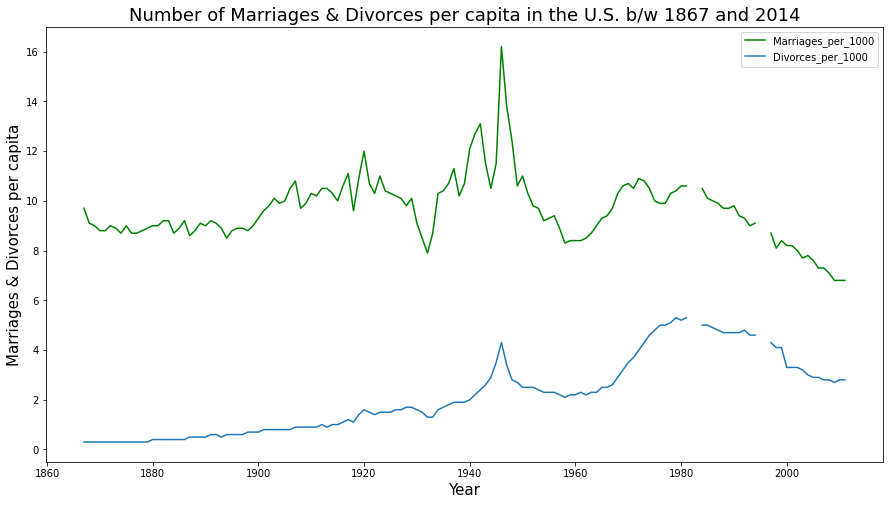

In [595]:
#line chart
plt.figure(figsize=(15, 8))
plt.plot(line_data['Year'], line_data['Marriages_per_1000'], color = 'green')
plt.plot(line_data['Year'], line_data['Divorces_per_1000'])
#title
plt.title('Number of Marriages & Divorces per capita in the U.S. b/w 1867 and 2014', fontsize = 18)
# labels
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Marriages & Divorces per capita',fontsize = 15)
#legend
plt.legend(['Marriages_per_1000','Divorces_per_1000'])
plt.show()

## Question 7

### Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

In [596]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# importing data 
bar_data = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# filtering data 
bar_data = bar_data[(bar_data.Year == 1900) | (bar_data.Year == 1950) | (bar_data.Year == 2000)]
bar_data = bar_data.drop(columns = ['Marriages', 'Divorces', 'Population'])
bar_data = bar_data.set_index('Year')
bar_data.head()

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


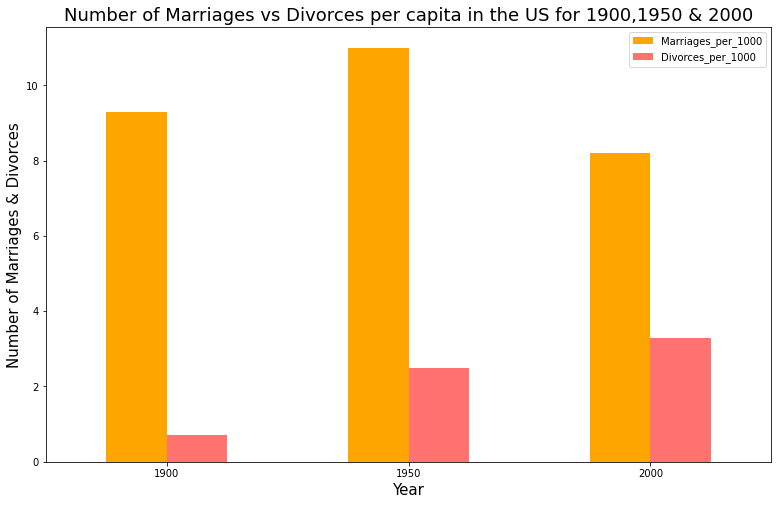

In [597]:
# bar chart
bar_data.plot.bar(figsize = (13,8), color ={'orange','#ff726f'})

#title
plt.title('Number of Marriages vs Divorces per capita in the US for 1900,1950 & 2000', fontsize = 18)

#labels
#x-axis
plt.xlabel('Year',fontsize = 15)
plt.xticks(rotation = 'horizontal')

#y-axis
plt.ylabel('Number of Marriages & Divorces', fontsize = 15)

#legend
plt.legend(['Marriages_per_1000','Divorces_per_1000'])
plt.show()

## Question 8

### Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [598]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

#importing data
actor = pd.read_csv("actor_kill_counts.csv")
actor = actor.sort_values(by=['Count'], ascending = True)

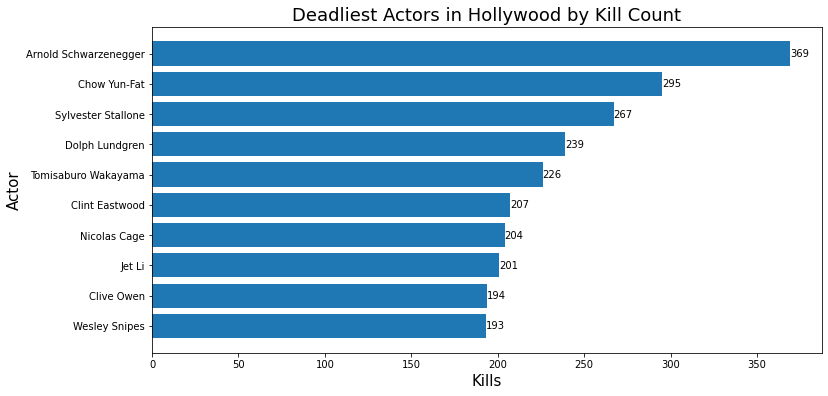

In [599]:
# Horizontal Bar Chart
plt.figure(figsize=(12, 6))
p = plt.barh(actor['Actor'],actor['Count'])
#labels
plt.xlabel('Kills', fontsize = 15)
plt.ylabel('Actor', fontsize = 15)
#title
plt.title('Deadliest Actors in Hollywood by Kill Count',fontsize = 18)
#adding bar labels
plt.bar_label(p)
plt.show()

## Question 9

### Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [603]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import data
romanEMP = pd.read_csv('roman-emperor-reigns.csv')
romanEMP.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [604]:
# grouping by categories (causes of death) 
group = pd.pivot_table(data = romanEMP, index = 'Cause_of_Death', values = 'Emperor', aggfunc = 'count').sort_values(by=['Emperor'],ascending = False)
group

,Emperor
Cause_of_Death,
Assassinated,22
Natural causes,16
Killed in battle,8
Possibly assassinated,8
Illness,5
Suicide,5
Executed,3
Died in captivity,1


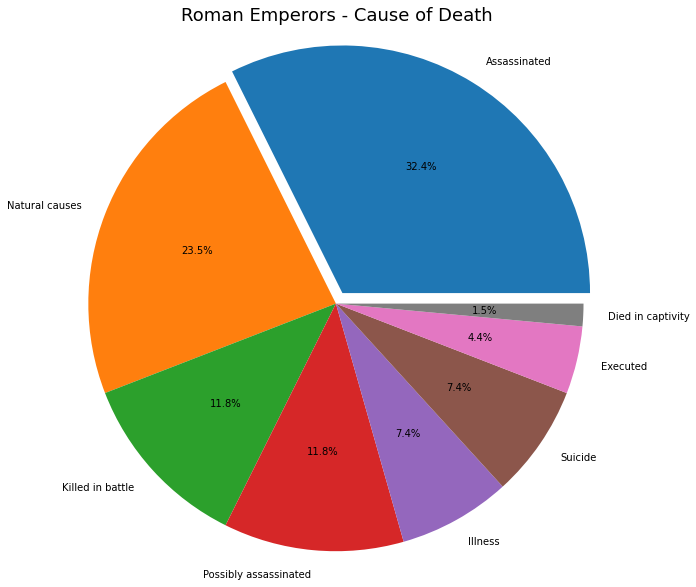

In [605]:
#data
y_values = np.array([22,16,8,8,5,5,3,1])
labels = []
for i in group.index:
    labels.append(i)
    
# explode for category Assassinated
explode = (0.05,0,0,0,0,0,0,0)

#pie chart
fig, ax = plt.subplots(figsize = (10,10))

#labels, axis, title
ax.pie(y_values, labels = labels, autopct = '%1.1f%%', explode = explode)
ax.axis('equal')
ax.set_title('Roman Emperors - Cause of Death',fontsize=18)
plt.show()

## Question 10

### Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year

In [644]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing data
data_rev = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', index_col = 0)
data_rev.head()

,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
Year,,
2000,1.196,861
2001,1.176,830
2002,1.269,809
2003,1.240,867
2004,1.307,948


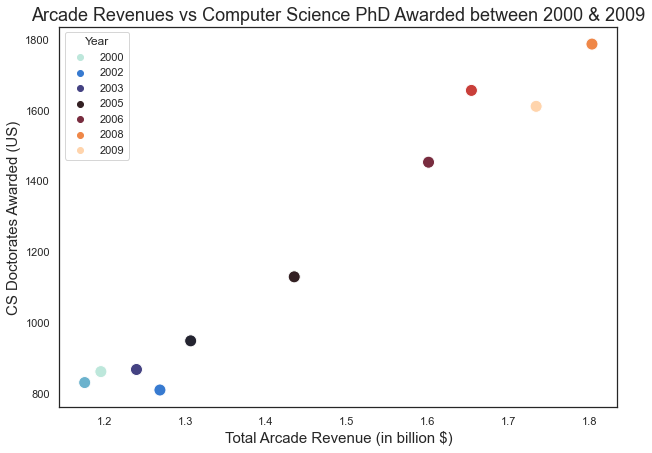

In [649]:
#creating figure
plt.figure(figsize = (10,7))
sns.set_theme(style = 'white')
#creating scatterplot and setting title
sns.scatterplot(y = 'Computer Science Doctorates Awarded (US)', x = 'Total Arcade Revenue (billions)', data = data_rev,
               hue = 'Year', palette = 'icefire', s = 145)
plt.title('Arcade Revenues vs Computer Science PhD Awarded between 2000 & 2009', fontsize = 18)
plt.ylabel('CS Doctorates Awarded (US)',fontsize = 15)
plt.xlabel('Total Arcade Revenue (in billion $)', fontsize = 15)

plt.show()